# `코칭스터디 <Data Science 2024>`
- Jason코치_07팀_4주차_미션제출
- 리드부스터: 동동이_리더
- 부스터: 권순환, 김민서, 조수영, 나영민, 노아, 세현, Peridot

# 📌 미션에 도전하기 전에 먼저!!

이번 미션에 활용되는 데이터를 다운로드 받기 위해, 주피터 노트북에서 다음 셀을 먼저 실행해주세요.

나의 컴퓨터 환경에 데이터를 저장하지 않아도, 웹 사이트에서 바로 데이터를 받아올 수 있습니다. 

원활한 피드백을 위해 미션을 제출할 때에도 아래 코드를 꼭 포함해서 제출해주세요!
[참고] 한글폰트 설정 : https://github.com/ychoi-kr/koreanize-matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

<데이터 특이사항>
```
오늘 활용할 데이터는 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 입니다.
합계, 계 데이터는 제외하였으며 판매유형별 데이터에도 면세점 데이터는 제외하고 다운로드 받은 데이터 입니다.
해당 데이터를 통해 온라인쇼핑을 통한 해외직접판매액에 대한 분석을 진행해 주세요!
[원본데이터] 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE```

## 🔽 데이터 현황을 확인하고 싶다면? 아래 코드를 통해 확인해보세요.

In [3]:
df

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325


# Q1

### 📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
데이터는 위에서 제공된 데이터를 사용합니다.
해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!
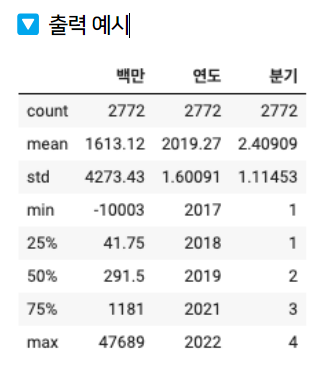

In [4]:
df.rename(columns={"데이터":"백만"}, inplace=True) #column 이름을 데이터에서 백만원으로 변경
df["연도"] = df["시점"].map(lambda x : int(x.split(".")[0])) #연도 columns 추가
df["분기"] = df["시점"].map(lambda x : int(x.split(".")[1].split("/")[0])) #분기 columns 추가

df.describe().round(1).astype(float) #기술 통계 정보

,백만,연도,분기
count,2772.0,2772.0,2772.0
mean,1613.1,2019.3,2.4
std,4273.4,1.6,1.1
min,-10003.0,2017.0,1.0
25%,41.8,2018.0,1.0
50%,291.5,2019.0,2.0
75%,1181.0,2021.0,3.0
max,47689.0,2022.0,4.0


*  전체 데이터의 평균 금액이 1613.1 백만 원, 표준편차가 4273.4로 상당히 크다는 것, 이 표준편차 원인 중 하나는 최소값이 -10003.0이고 최대값이 47689.0으로 매우 극단적인 값들이 존재하기 때문
* 데이터의 연도가 2017년부터 2022년까지 포함되어 있음을 알 수 있음. 표준편차가 1.6으로 작은 편이므로, 데이터가 비교적 짧은 기간 내에 집중되어 있음
* 최소값이 1, 최대값이 4로, 1분기부터 4분기까지의 데이터가 있음

# Q2

### 📌 Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.
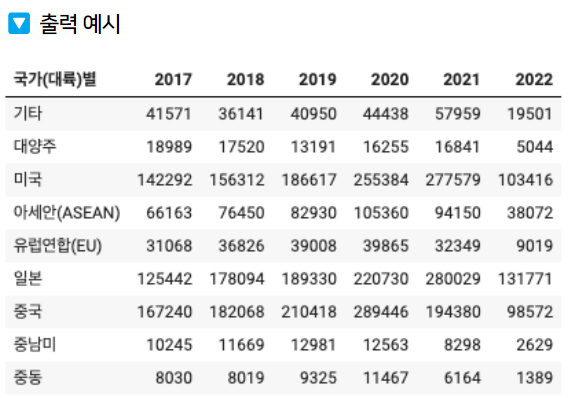

In [5]:
sale_by_country  = df.pivot_table(index="국가(대륙)별", columns="연도", values="백만", aggfunc="sum")
sale_by_country

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


<AxesSubplot:xlabel='연도'>

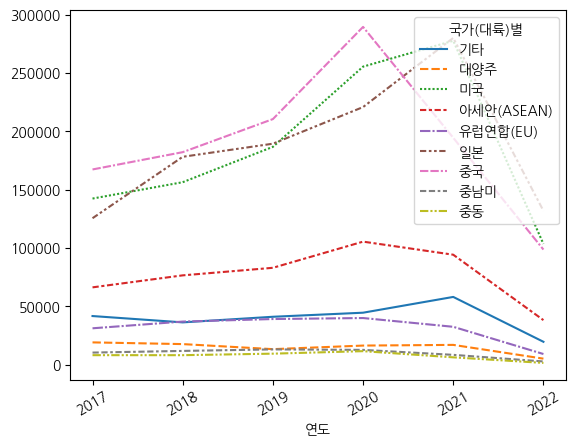

In [6]:
plt.xticks(rotation=30)
sns.lineplot(data=sale_by_country.T)

# Q3

### 📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [7]:
df_sample = df[df["연도"] == 2020]

<AxesSubplot:xlabel='국가(대륙)별', ylabel='백만'>

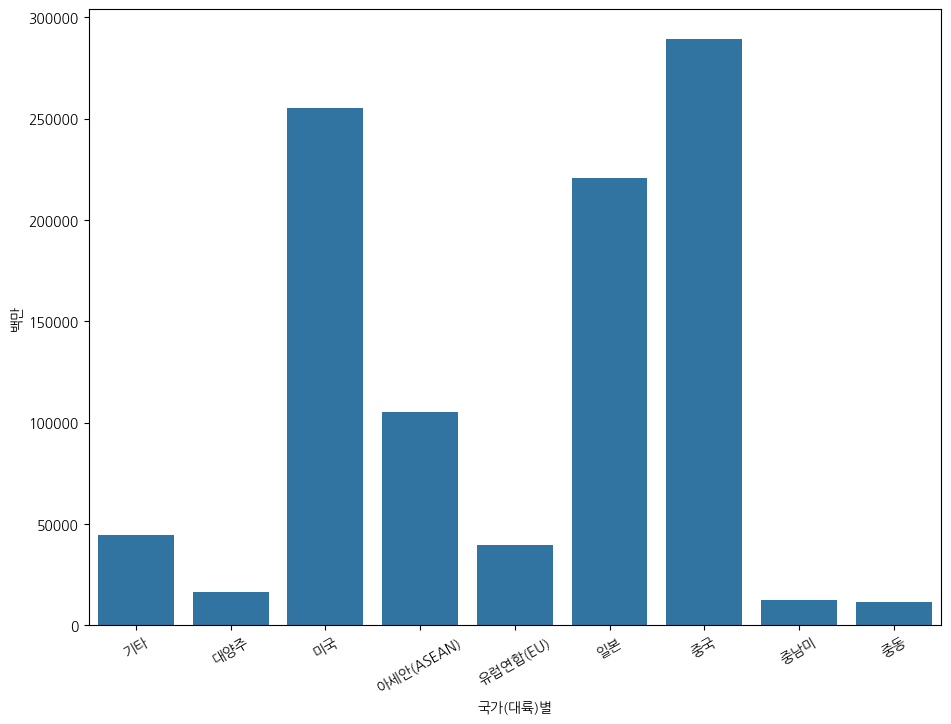

In [8]:
df_sum = df_sample.groupby("국가(대륙)별")["백만"].sum().reset_index()
plt.figure(figsize=(11, 8))
plt.xticks(rotation=30)
sns.barplot(x="국가(대륙)별", y="백만", data=df_sum)

In [9]:
df_sample2 = df_sample.groupby(["국가(대륙)별", "상품군별"])["백만"].sum()
df_unstack = df_sample2.unstack()
df_unstack

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716,3345,9,187,1464,4563,21,755,1646,1596,1410,6501,5653,15572
대양주,3825,923,1,21,1198,367,20,690,484,403,1800,3746,318,2459
미국,10103,38731,33,398,11467,9709,865,5862,4934,2706,32919,82154,6057,49446
아세안(ASEAN),12405,2620,17,3279,6432,4192,3,7423,2698,4291,16135,37992,541,7332
유럽연합(EU),3040,3907,0,25,2560,514,99,1297,1354,423,12092,5120,1910,7524
일본,404,30509,2,1526,3911,1055,27,646,1353,4699,14738,119452,193,42215
중국,1353,22736,88,403,7142,6659,4,3999,5606,4220,125078,73068,235,38855
중남미,912,625,0,3,1361,188,15,183,151,774,6421,614,362,954
중동,839,533,0,4,1060,139,17,196,121,927,3250,1776,388,2217


<AxesSubplot:xlabel='국가(대륙)별', ylabel='백만'>

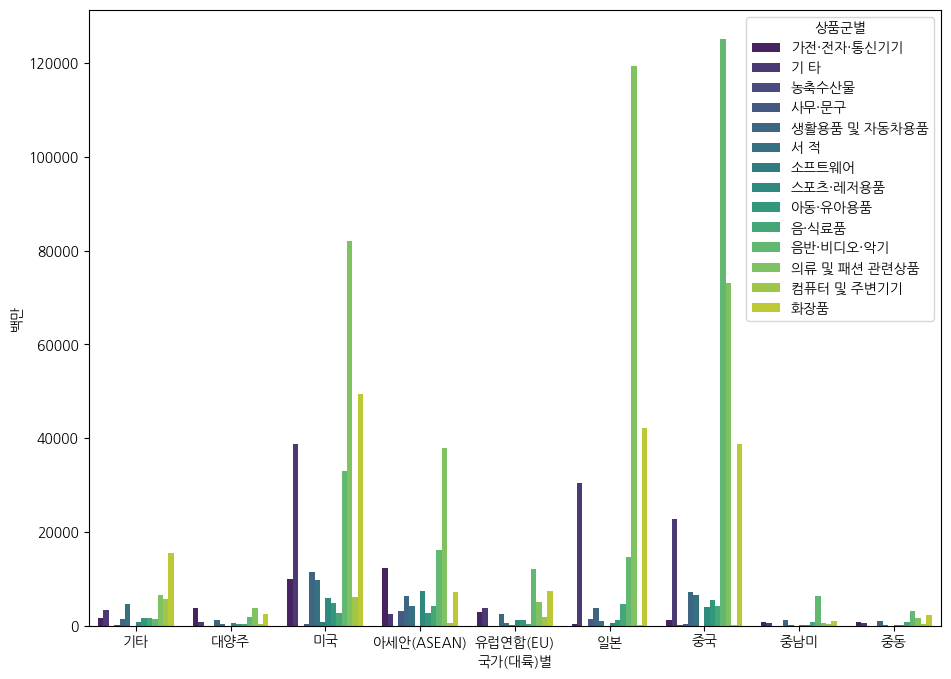

In [10]:
df_long = df_unstack.reset_index().melt(id_vars='국가(대륙)별', var_name='상품군별', value_name='백만')
plt.figure(figsize=(11, 8))
sns.barplot(x='국가(대륙)별', y='백만', hue='상품군별', data=df_long, palette='viridis')

# Q4

### 📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.
```
온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다.
2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.
```
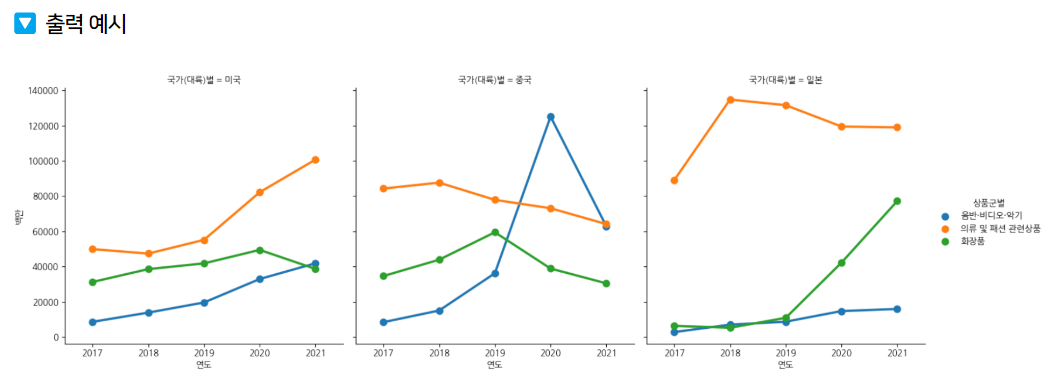

In [11]:
df_preprocessing = df[
    df["국가(대륙)별"].isin(["미국", "중국", "일본"]) &
    df["상품군별"].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"])
].copy()

df_preprocessing_2021 = df_preprocessing[df_preprocessing["연도"] <= 2021]

df_pivot = df_preprocessing_2021.pivot_table(
    index=['국가(대륙)별', '상품군별'],
    columns='연도',
    values='백만',
    aggfunc='sum'
)

df_pivot

연도                     2017    2018    2019    2020    2021
국가(대륙)별 상품군별                                               
미국      음반·비디오·악기      8628   13858   19596   32919   41841
        의류 및 패션 관련상품  49891   47353   55125   82154  100662
        화장품           31237   38537   41786   49446   38665
일본      음반·비디오·악기      2824    7018    8712   14738   15940
        의류 및 패션 관련상품  89085  134742  131538  119452  118959
        화장품            6333    5276   10906   42215   77124
중국      음반·비디오·악기      8437   15046   36193  125078   62874
        의류 및 패션 관련상품  84248   87611   77844   73068   64078
        화장품           34608   43873   59445   38855   30472

In [12]:
df_pivot = df_preprocessing_2021.pivot_table(
    index=['국가(대륙)별', '상품군별'],
    columns='연도',
    values='백만',
    aggfunc='sum'
).reset_index()

df_pivot.columns.name = None
df_pivot

,국가(대륙)별,상품군별,2017,2018,2019,2020,2021
0,미국,음반·비디오·악기,8628,13858,19596,32919,41841
1,미국,의류 및 패션 관련상품,49891,47353,55125,82154,100662
2,미국,화장품,31237,38537,41786,49446,38665
3,일본,음반·비디오·악기,2824,7018,8712,14738,15940
4,일본,의류 및 패션 관련상품,89085,134742,131538,119452,118959
5,일본,화장품,6333,5276,10906,42215,77124
6,중국,음반·비디오·악기,8437,15046,36193,125078,62874
7,중국,의류 및 패션 관련상품,84248,87611,77844,73068,64078
8,중국,화장품,34608,43873,59445,38855,30472


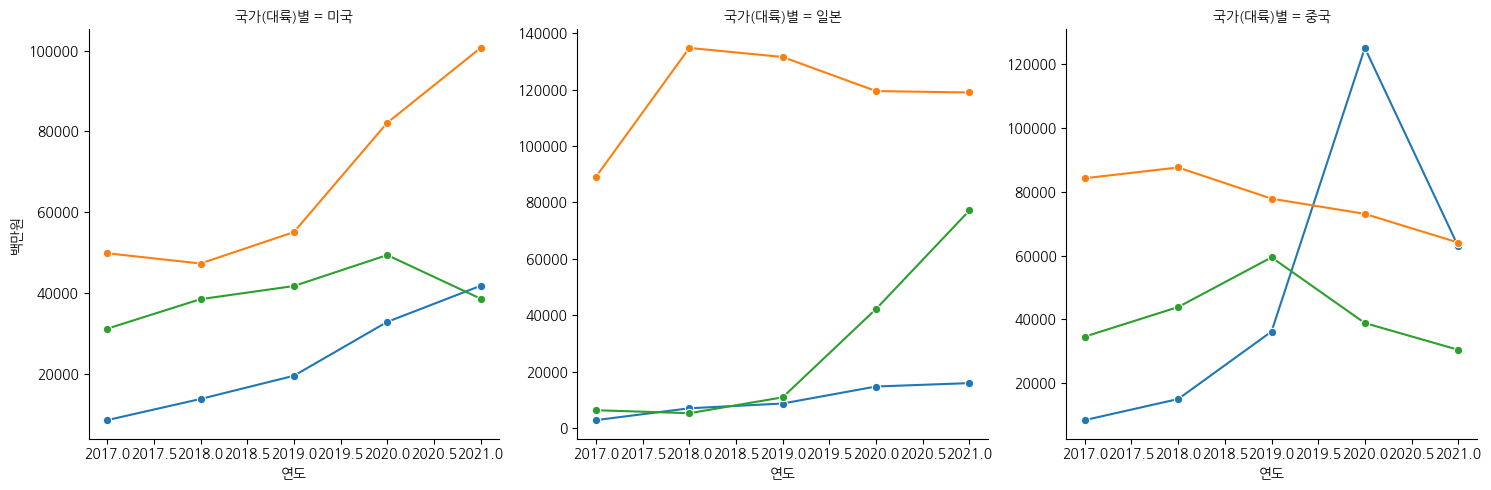

In [13]:
df_long_pivot = df_pivot.melt(id_vars=['국가(대륙)별', '상품군별'], var_name='연도', value_name='백만원')

g = sns.FacetGrid(df_long_pivot, col='국가(대륙)별', col_wrap=3, sharey=False, height=5)

g.map_dataframe(sns.lineplot, x='연도', y='백만원', hue='상품군별', marker='o')

### 📌 Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.
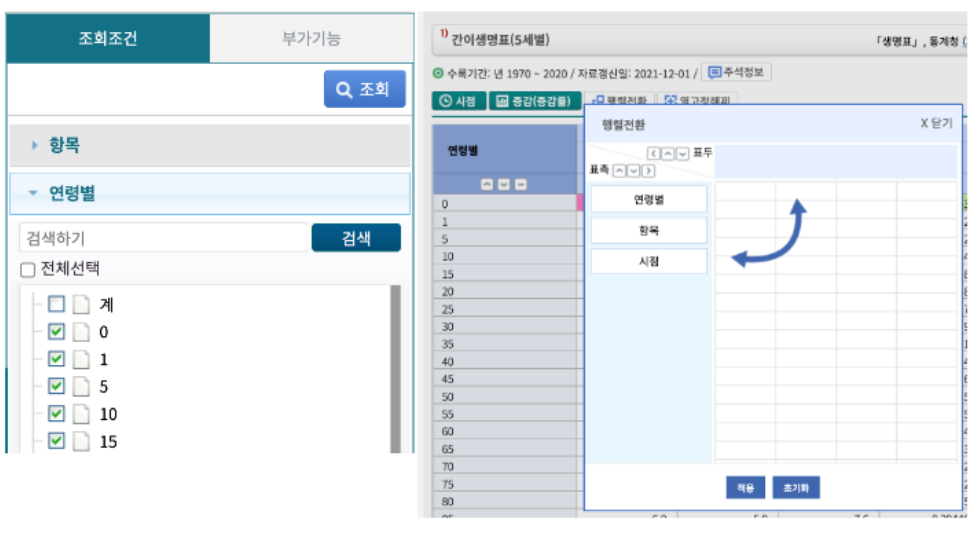